# Tree Ensembles: Practical Demonstration (Bagging)


This Notebook contains the code used in the Medium Article called [Tree Ensembles: Theory and Practice](https://www.google.es) for the Bagging Practical Demonstration

In [1]:
import random
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from synthetic_data import create_data

RANDOM_SEED = 42

## Synthetic Dataset

A small synthetic dataset is created in order to easily show how bagging works. For this notebook, a categorical feature is going to be predicted

In [2]:
dataframe = create_data(categorical=True)
display(dataframe)

,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW
2,75,False,True,2,LOW
3,120,True,False,3,LOW
4,230,True,True,4,HIGH
5,175,False,False,3,HIGH
6,80,False,False,3,MEDIUM
7,90,True,False,3,LOW
8,350,False,True,6,HIGH
9,275,True,True,4,MEDIUM


## Bagging

We are going to select 5 different samples (n=5) using the random.choices() function.

In [3]:
# First we get the indexes of the dataframe
indexes = list(dataframe.index)

# The seed is set so the results can be reproduced in the future
random.seed(RANDOM_SEED)

# random.choices get 7 (k=7) indexes. Note that the indexes can be repeated in the samples
sample_0 = random.choices(indexes, k=7)
sample_1 = random.choices(indexes, k=7)
sample_2 = random.choices(indexes, k=7)
sample_3 = random.choices(indexes, k=7)
sample_4 = random.choices(indexes, k=7)

samples = [sample_0, sample_1, sample_2, sample_3, sample_4]

print(f"Sample 0 contains: {sample_0}")
print(f"Sample 1 contains: {sample_1}")
print(f"Sample 2 contains: {sample_2}")
print(f"Sample 3 contains: {sample_3}")
print(f"Sample 4 contains: {sample_4}")

Sample 0 contains: [6, 0, 2, 2, 7, 6, 8]
Sample 1 contains: [0, 4, 0, 2, 5, 0, 1]
Sample 2 contains: [6, 5, 2, 5, 8, 0, 8]
Sample 3 contains: [6, 3, 1, 9, 3, 0, 0]
Sample 4 contains: [8, 6, 8, 7, 5, 9, 3]


In [4]:
def train_decision_tree_on_sample(dataframe, sample, features, output):
    """
        Function that trains a decision tree classifier on a sample of a dataframe.
    """
    # Define the decision tree
    dtc = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=3)
    
    # Getting the sample from the dataframe using the indexes
    df_sample = dataframe.iloc[sample].copy()
    
    # Splitting the dataset in features and target
    df_sample_X = df_sample[features].copy()
    df_sample_Y = df_sample[output].copy()
    
    # Training the tree
    dtc.fit(df_sample_X, df_sample_Y)
    
    # Display the sample
    display(df_sample)
    
    # Plot the tree
    plt.figure(figsize=(10, 10))
    tree.plot_tree(dtc, feature_names=features, class_names=sorted(df_sample_Y.unique()))
    plt.show()

    return dtc

def get_predictions(dataframe, dtc, features, output):
    """
        Function that gets the predictions, given the dataframe and tree.
    """
    dataframe_X = dataframe[features].copy()
    predictions = dtc.predict(dataframe_X)
    
    return predictions    

,square_meters,has_garage,has_garden,rooms,price
6,80,False,False,3,MEDIUM
0,100,True,False,2,MEDIUM
2,75,False,True,2,LOW
2,75,False,True,2,LOW
7,90,True,False,3,LOW
6,80,False,False,3,MEDIUM
8,350,False,True,6,HIGH


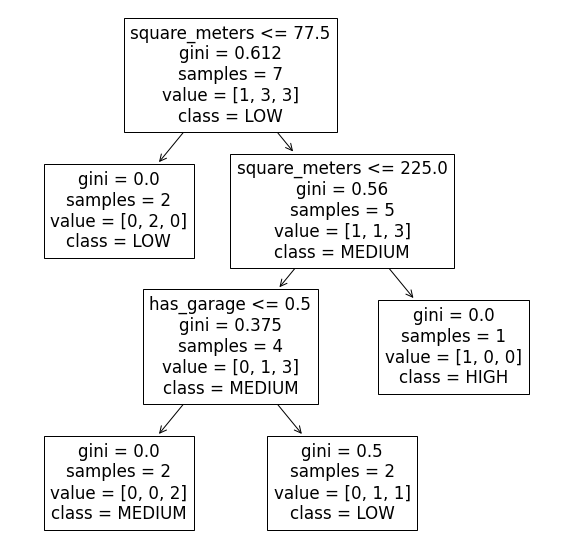

Tree 0 has an accuracy of 70.0


,square_meters,has_garage,has_garden,rooms,price
0,100,True,False,2,MEDIUM
4,230,True,True,4,HIGH
0,100,True,False,2,MEDIUM
2,75,False,True,2,LOW
5,175,False,False,3,HIGH
0,100,True,False,2,MEDIUM
1,50,False,False,1,LOW


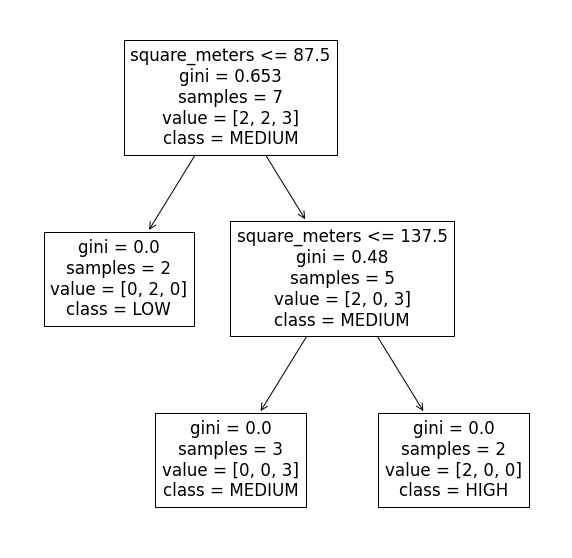

Tree 1 has an accuracy of 60.0


,square_meters,has_garage,has_garden,rooms,price
6,80,False,False,3,MEDIUM
5,175,False,False,3,HIGH
2,75,False,True,2,LOW
5,175,False,False,3,HIGH
8,350,False,True,6,HIGH
0,100,True,False,2,MEDIUM
8,350,False,True,6,HIGH


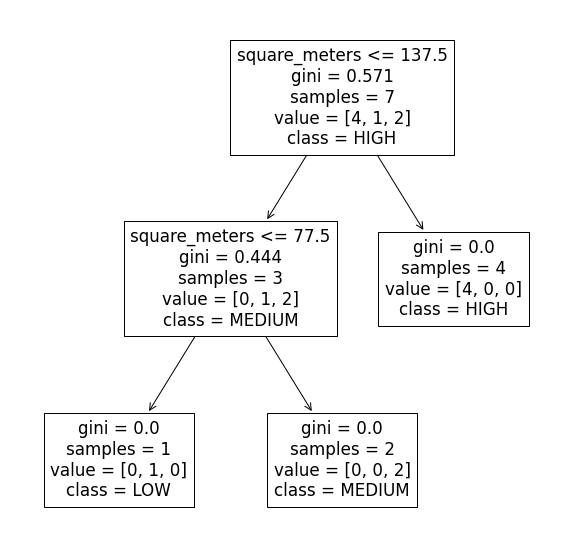

Tree 2 has an accuracy of 70.0


,square_meters,has_garage,has_garden,rooms,price
6,80,False,False,3,MEDIUM
3,120,True,False,3,LOW
1,50,False,False,1,LOW
9,275,True,True,4,MEDIUM
3,120,True,False,3,LOW
0,100,True,False,2,MEDIUM
0,100,True,False,2,MEDIUM


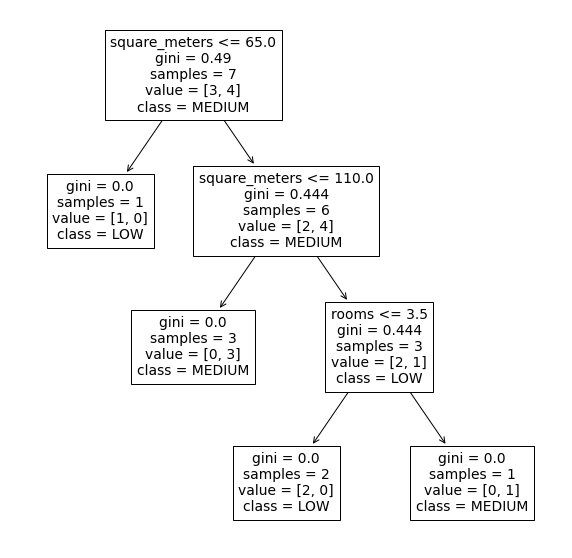

Tree 3 has an accuracy of 50.0


,square_meters,has_garage,has_garden,rooms,price
8,350,False,True,6,HIGH
6,80,False,False,3,MEDIUM
8,350,False,True,6,HIGH
7,90,True,False,3,LOW
5,175,False,False,3,HIGH
9,275,True,True,4,MEDIUM
3,120,True,False,3,LOW


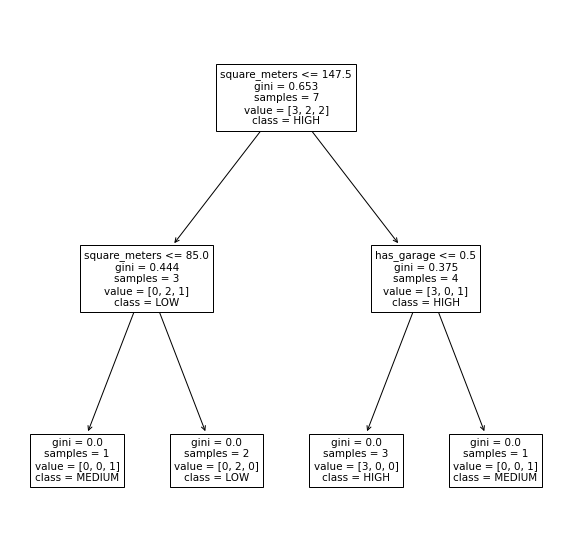

Tree 4 has an accuracy of 60.0


In [5]:
# Define the features to use by the tree and the output to predict (target)
features = ["square_meters", "has_garage", "has_garden", "rooms"]
output = "price"

# Objects to save the results while iterating over the different samples
accuracy_results = {}
dataframe_with_results = dataframe.copy()

# For each sample, a tree is going to be trained
for count, sample in enumerate(samples):
    # First we train the decision tree on the sample
    dtc = train_decision_tree_on_sample(dataframe, sample, features, output)
    
    # Then, we predict all the dataframe with the tree and save the predictions
    predictions = get_predictions(dataframe, dtc, features, output)
    
    # Save the predictions of the tree
    tree_name = f"tree_{count}"
    dataframe_with_results[tree_name] = predictions
    
    # Save the accuracy of the tree
    accuracy = (dataframe_with_results[tree_name] == dataframe_with_results["price"]).mean() * 100
    accuracy_results[tree_name] = accuracy
    print(f"Tree {count} has an accuracy of {accuracy}")
    
# Once every sample is used, a bagging prediction is made using the most common prediction of all the trees
tree_columns = dataframe_with_results.columns[dataframe_with_results.columns.str.contains("tree")]
dataframe_with_results["bagging"] = dataframe_with_results[tree_columns].mode(axis=1)

# Bagging accuracy is also saved
accuracy_results["bagging"] = (dataframe_with_results["bagging"] == dataframe_with_results["price"]).mean() * 100

In [6]:
# Results of every tree
dataframe_with_results

,square_meters,has_garage,has_garden,rooms,price,tree_0,tree_1,tree_2,tree_3,tree_4,bagging
0,100,True,False,2,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM,LOW,MEDIUM
1,50,False,False,1,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW
2,75,False,True,2,LOW,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW
3,120,True,False,3,LOW,LOW,MEDIUM,MEDIUM,LOW,LOW,LOW
4,230,True,True,4,HIGH,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,HIGH
5,175,False,False,3,HIGH,MEDIUM,HIGH,HIGH,LOW,HIGH,HIGH
6,80,False,False,3,MEDIUM,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM,MEDIUM
7,90,True,False,3,LOW,LOW,MEDIUM,MEDIUM,MEDIUM,LOW,MEDIUM
8,350,False,True,6,HIGH,HIGH,HIGH,HIGH,MEDIUM,HIGH,HIGH
9,275,True,True,4,MEDIUM,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,HIGH


In [7]:
# Showing the accuracy results
pd.DataFrame(accuracy_results, index=[0]).T.reset_index().rename({"index": "Learner", 0: "Accuracy"}, axis="columns")

,Learner,Accuracy
0,tree_0,70.0
1,tree_1,60.0
2,tree_2,70.0
3,tree_3,50.0
4,tree_4,60.0
5,bagging,80.0
